In [1]:
import time
from StepParser import *
import yaml

start = time.time()
ifc = parse_file('bolt.ifc')
#ifc = parse_file('test.step')

print('parsed in ', time.time() - start)


parsed in  0.07999682426452637


In [2]:
import matplotlib.pyplot as plt
import networkx as nx

#G = nx.random_geometric_graph(200,0.125)

In [3]:


G = nx.DiGraph()
#G = nx.Graph()
labels = {}

def parse_token_to_graph(token, parent = None):
    #print(type(token))
    if type(token) is Anchor:
        def token_by_id(id):
            for token in ifc:
                if type(token) is not Token:
                    continue
                if token.id == id:
                    return token
            return None

        tt = token_by_id(token.id)
        
        if tt is not None:
            labels[parent] = parent
            labels[tt] = tt
            #print(parent, tt)
            G.add_edge(str(tt),str(parent),color='r', weight=2, size=100)
    elif type(token) is Token:
        for a in token.arguments:            
            parse_token_to_graph(a, token)
    elif type(token) is list:
        for item in token:
            parse_token_to_graph(item, parent)    
    else:
        if parent is not None:
            labels[token] = token
            labels[parent] = parent
            if type(token) is Token:
                G.add_edge(str(parent),str(token),color='g', weight=1, size=100)

for token in ifc:
    if type(token) is not Token:
        continue
       
    parse_token_to_graph(token)
            

print(len(G.nodes))
print(len(G.edges))
#pos = nx.kamada_kawai_layout(G)
#pos = nx.spiral_layout(G)
#nx.draw(G, pos = pos, node_size = 2, with_labels = True)

1031
1172


In [4]:
#https://stackoverflow.com/questions/25639169/networkx-change-color-width-according-to-edge-attributes-inconsistent-result        
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

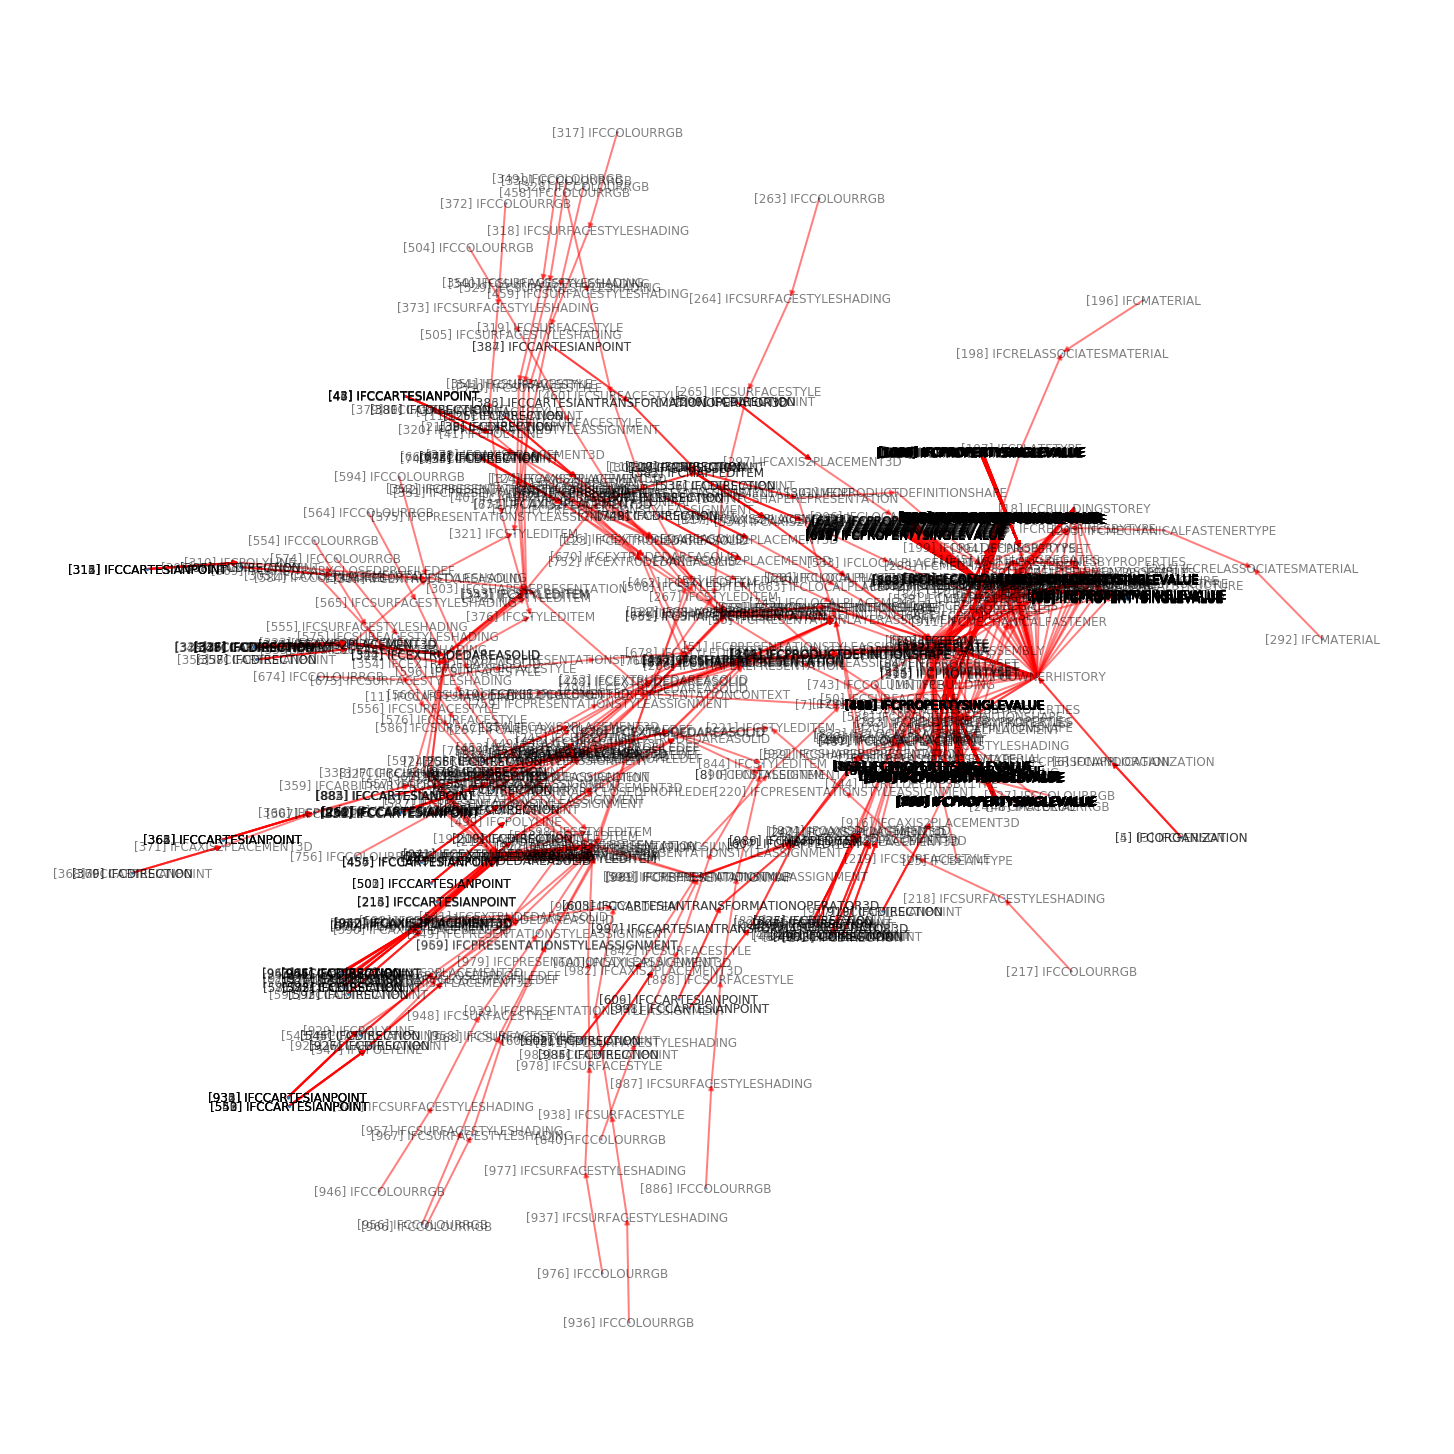

In [5]:
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos,
        edges=edges, edge_color=colors, width=weights,
        node_size=2, alpha=0.5, with_labels=True)

plt.savefig("graph.png")
plt.show()

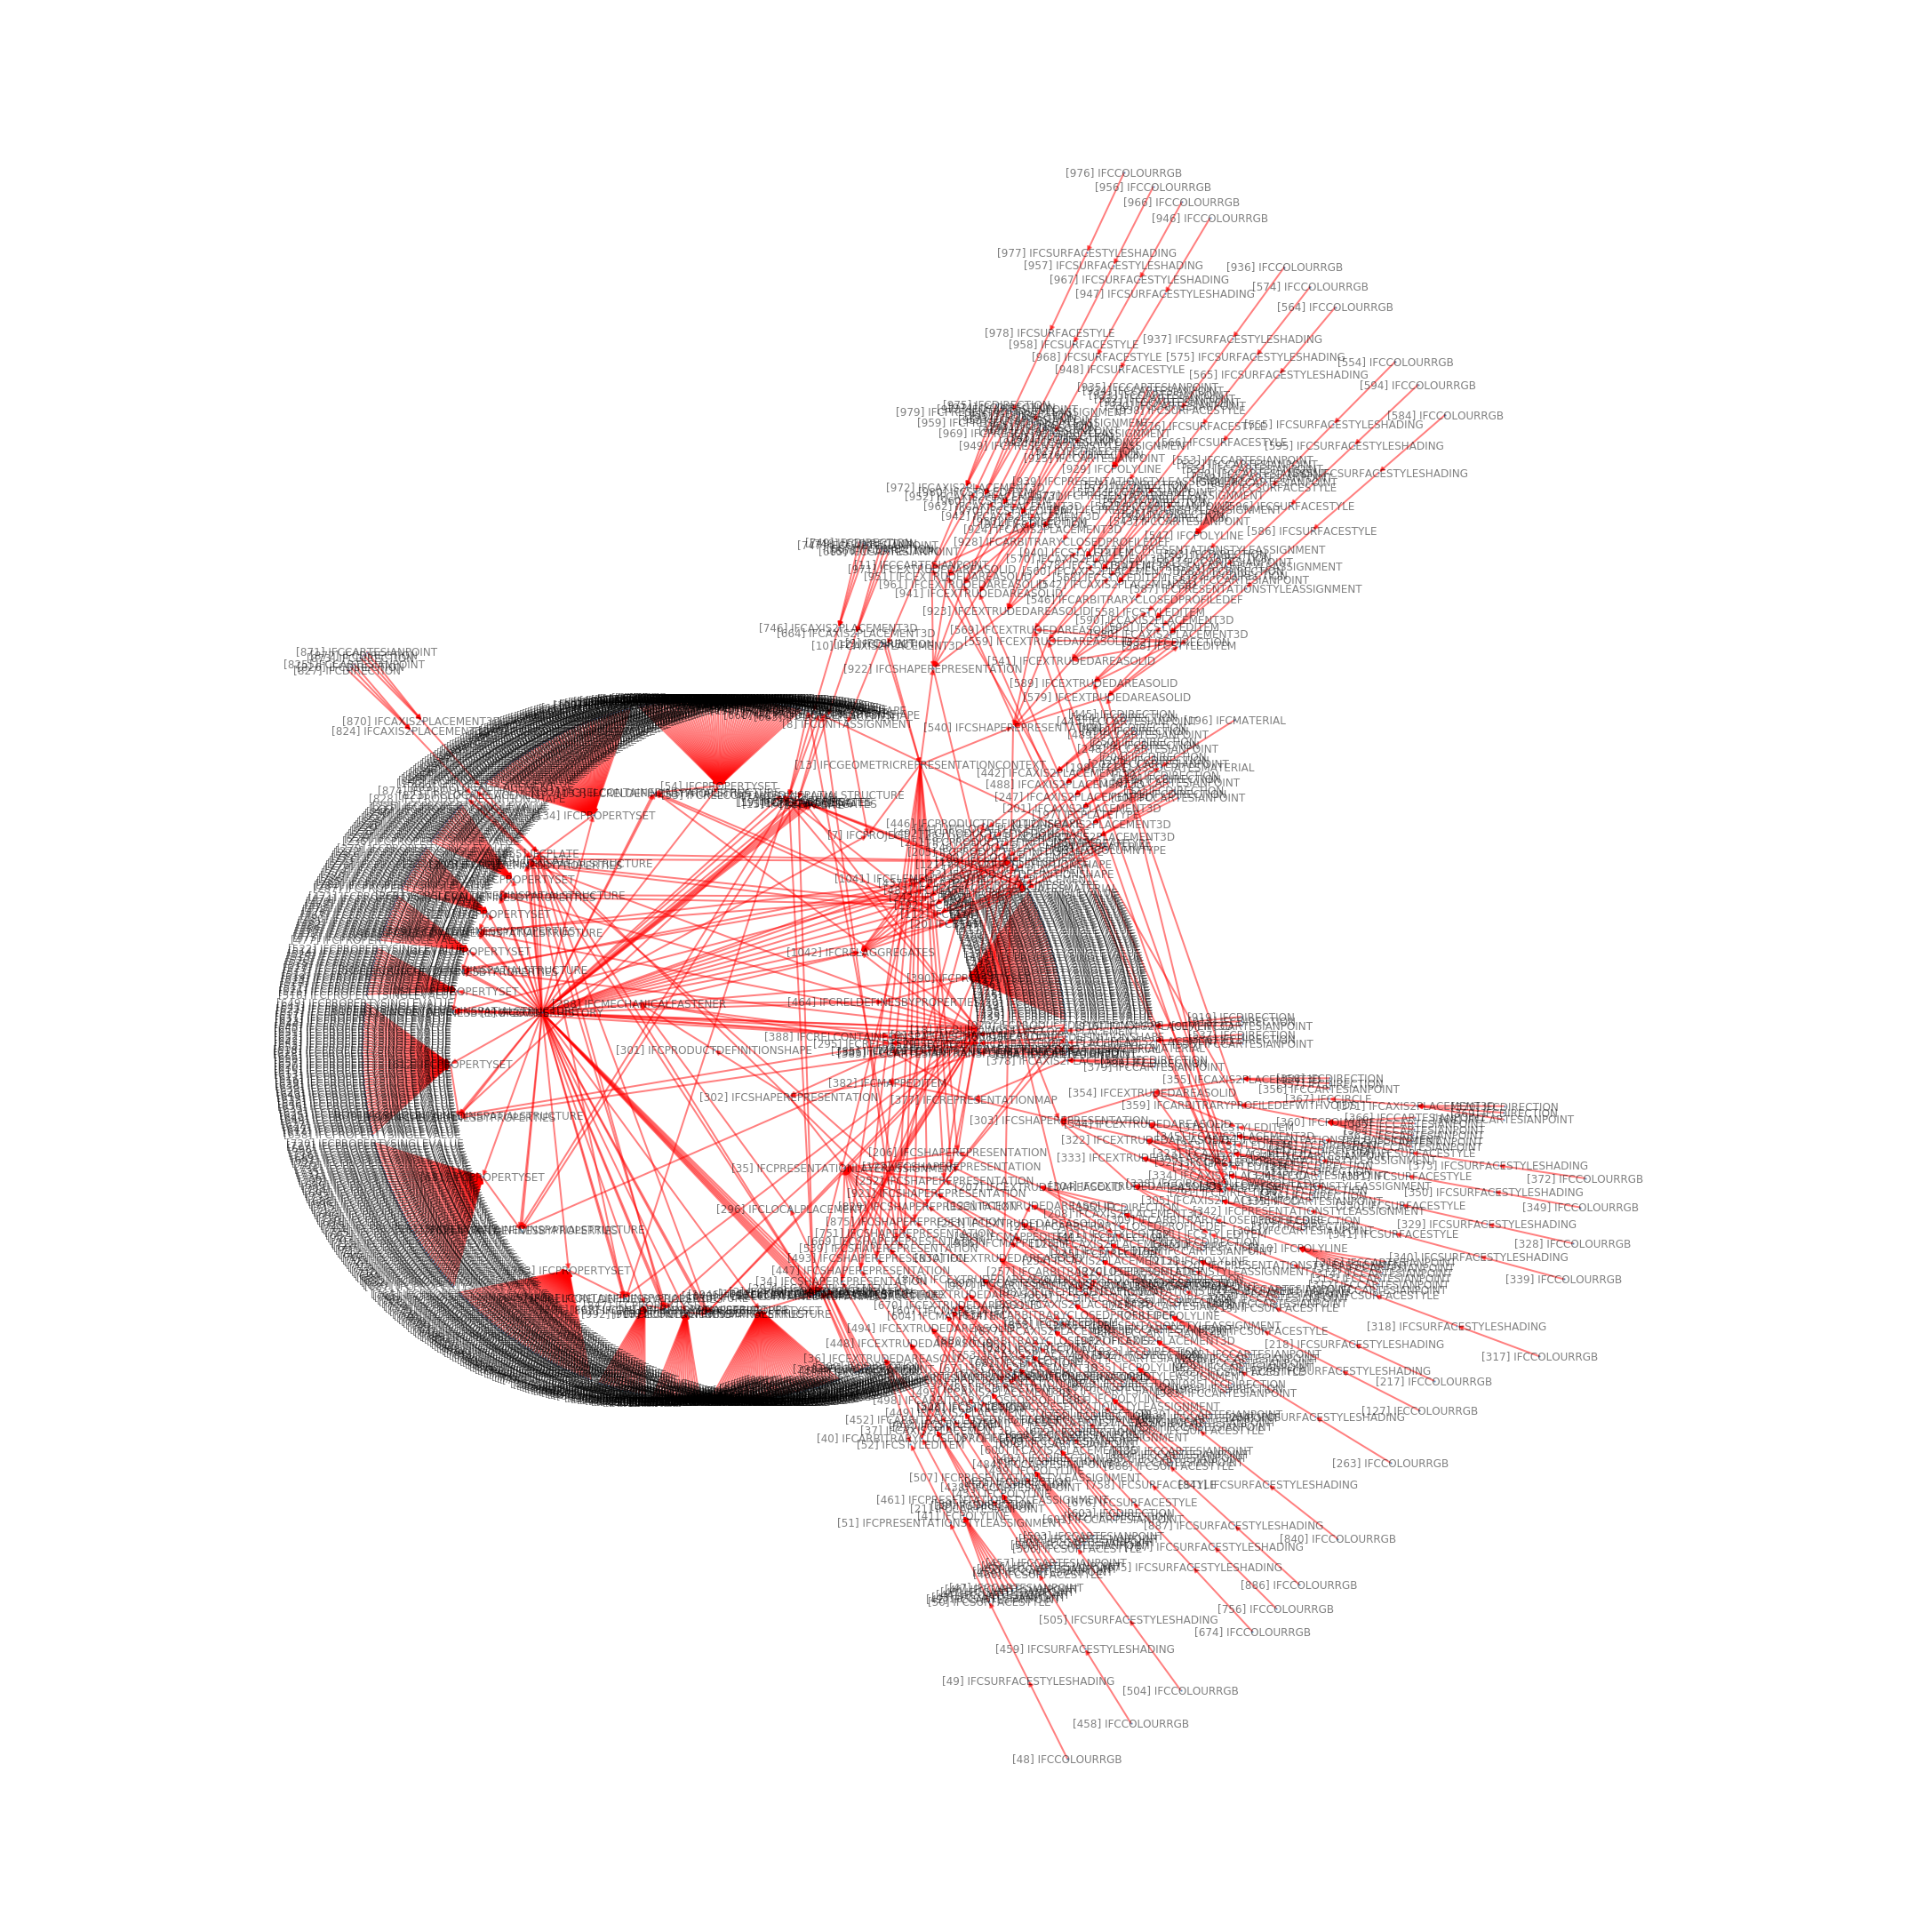

In [6]:
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")
        
# https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pydot.graphviz_layout.html#networkx.drawing.nx_pydot.graphviz_layout
#pos = graphviz_layout(G, prog = 'dot')
pos = graphviz_layout(G, prog='twopi')

plt.figure(figsize=(30, 30))
nx.draw(G, pos, 
        edges=edges, edge_color=colors, width=weights,
        node_size=2, alpha=0.5, with_labels=True)
plt.axis('equal')
plt.savefig("circ_tree_graph.png")
plt.show()